In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 

In [7]:
pd.options.display.max_columns = None

In [3]:
dataset = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [10]:
dataset.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [11]:
data = dataset[['age','amount','balance']]

In [15]:
data.head()

,age,amount,balance
0,26,16.25,35.39
1,26,14.19,21.20
2,38,6.42,5.71
3,40,40.90,2117.22
4,26,3.25,17.95


In [13]:
data.describe()

,age,amount,balance
count,12043.000000,12043.000000,12043.000000
mean,30.582330,187.933588,14704.195553
std,10.046343,592.599934,31503.722652
min,18.000000,0.100000,0.240000
25%,22.000000,16.000000,3158.585000
50%,28.000000,29.000000,6432.010000
75%,38.000000,53.655000,12465.945000
max,78.000000,8835.980000,267128.520000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      12043 non-null  int64  
 1   amount   12043 non-null  float64
 2   balance  12043 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 282.4 KB


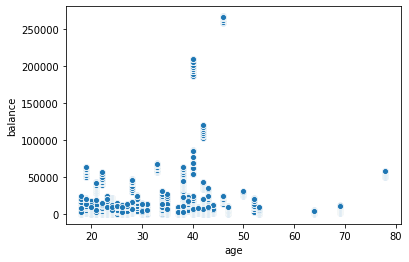

In [16]:
sns.scatterplot(x=data['age'],y=data['balance'],data=data)

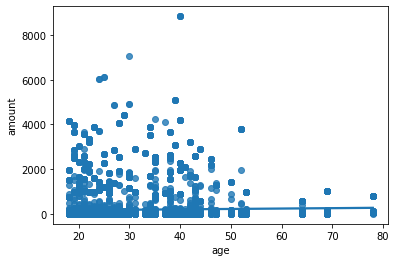

In [19]:
 sns.regplot(x=data['age'],y=data['amount'],data=data)

# REGRESSION MODEL

In [20]:
x = data[['age','balance']]
y = data['balance']

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 1/4, random_state =0)

In [26]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
pred= regr.predict(X_test)

In [36]:
pred

array([2162.15, 6820.47, 6353.98, ..., 4872.16,  605.9 ,  515.07])

In [37]:
y_test

3294     2162.15
10018    6820.47
10346    6353.98
11015    3955.91
7088     7172.29
          ...   
2124     2136.10
2580     4765.17
6981     4872.16
257       605.90
321       515.07
Name: balance, Length: 3011, dtype: float64

In [35]:
regr.score(X_test,y_test)

1.0

# THE MODEL DID WELL BECAUSE ITS SCORE IS 1.0